
## Improving the Performance of CNNs: Classifying Cats vs. Dogs

<font color="red">  Before you start running the code in this notebook, change the runtime type to GPU to speed up the training process.

(Runtime -> Change runtime type -> Hardware accelerator -> GPU). </font>

In this notebook, we will continue working on the image classification problem we started last week. Recall that our goal was to develop CNNs to classify images as "dogs" or "cats" in a dataset containing 4000 images of cats and dogs. We had 2000 images for training, 1000 for validation, and 1000 for testing.

First, add the `cats_dogs_small` folder from [here](https://drive.google.com/drive/folders/11-2z9P45FtJJPm9LbipVMAnNZ36kMQUH) to your Google Drive. For example, you can drag and drop the `cats_dogs_small` folder into your "My Drive"; this will add a shortcut to the original folder in your "My Drive". By doing so, you can run your code directly on the data that are stored on my Google Drive account without the need to download the images and upload them to your Drive.

The next step is to mount your Google Drive so that you can use its content (e.g., the datasets) in your notebook.

In [ ]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# The first time that you run this cell, you will need to authorize access in your drive.
# Go to the link and copy the authorization code

Mounted at /content/drive


In [ ]:
import os
# Define base directory where the "cats_dogs_small" folder reside
# My path is the following:
base_dir = '/content/drive/My Drive/Data/CNN_Datasets/cats_dogs_small'
# This is the path to where my files are - your path will be different.
# Modify the path above to where the "cats_dogs_small" folder is located on your drive.

# Define directories of where the training, validation and test sets reside
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# Define directories of where the cats and dogs images reside
train_cats_dir = os.path.join(base_dir, 'train/cats')
train_dogs_dir = os.path.join(base_dir, 'train/dogs')
validation_cats_dir = os.path.join(base_dir, 'validation/cats')
validation_dogs_dir = os.path.join(base_dir, 'validation/dogs')
test_cats_dir = os.path.join(base_dir, 'test/cats')
test_dogs_dir = os.path.join(base_dir, 'test/dogs')

In [ ]:
# Let's check the number of images in each set
print('Total training cat images:', len(os.listdir(train_cats_dir)))
print('Total training dog images:', len(os.listdir(train_dogs_dir)))
print('Total validation cat images:', len(os.listdir(validation_cats_dir)))
print('Total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('Total test cat images:', len(os.listdir(test_cats_dir)))
print('Total test dog images:', len(os.listdir(test_dogs_dir)))

Total training cat images: 1000
Total training dog images: 1000
Total validation cat images: 500
Total validation dog images: 500
Total test cat images: 500
Total test dog images: 500


Let's use the code we had from the previous notebook to develop our base model without any regularization.

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

# Build the model
model1 = models.Sequential()

model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Flatten())

model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model1.compile(loss='binary_crossentropy',
               optimizer='rmsprop',
               metrics=['accuracy'])

Next, we use `ImageDataGenerator` to automatically and quickly read the images, decode them into RGB grids of pixels, convert them into floating point tensors, rescale the pixel values to be between 0 and 1, and create batches of data for training and validation.  

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the directory where our training data reside
        train_dir,
        # We want all images to be resized to 150x150
        target_size=(150, 150),
        # Telling the data generator to prepare data in batches of size 20
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')
        # Note: If our problem was a multi-class single-label classification,
        # we would use categorical_crossentropy loss and set class_mode to 'categorical'

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Now, we are ready to train our model using `model.fit`. Recall that we are going to use Python generators to create training and validation batches and pass them to `model.fit`. I am going to train "model1" again below, so the results will be slightly different than the previous time due to random initialization of filter values (weights) and biases.

In [ ]:
model1_history = model1.fit(
      train_generator,
      epochs=20,
      validation_data=validation_generator)

Epoch 1/20
100/100 [==============================] - 13s 130ms/step - loss: 0.7199 - accuracy: 0.5210 - val_loss: 0.6966 - val_accuracy: 0.5000
Epoch 2/20
100/100 [==============================] - 13s 127ms/step - loss: 0.6978 - accuracy: 0.5705 - val_loss: 0.6514 - val_accuracy: 0.6440
Epoch 3/20
100/100 [==============================] - 13s 126ms/step - loss: 0.6471 - accuracy: 0.6460 - val_loss: 0.5987 - val_accuracy: 0.6700
Epoch 4/20
100/100 [==============================] - 13s 127ms/step - loss: 0.5713 - accuracy: 0.7040 - val_loss: 0.6204 - val_accuracy: 0.6530
Epoch 5/20
100/100 [==============================] - 13s 128ms/step - loss: 0.5264 - accuracy: 0.7430 - val_loss: 0.5636 - val_accuracy: 0.7030
Epoch 6/20
100/100 [==============================] - 13s 126ms/step - loss: 0.4673 - accuracy: 0.7785 - val_loss: 0.6417 - val_accuracy: 0.7160
Epoch 7/20
100/100 [==============================] - 13s 127ms/step - loss: 0.4325 - accuracy: 0.7990 - val_loss: 0.5923 - val_ac

Let's plot the loss of the model during training.

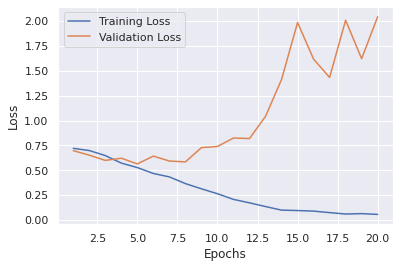

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

train_loss1 = model1_history.history['loss']
val_loss1 = model1_history.history['val_loss']

epochs = range(1, len(train_loss1) + 1)

plt.plot(epochs, train_loss1, label = 'Training Loss')
plt.plot(epochs, val_loss1, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

These plots are demonstrating overfitting. Our validation loss reaches its minimum after 8 epochs then it increases, while the training loss keeps decreasing until it reaches nearly 0.

Because we only have relatively few training samples (2000), overfitting is going to be our number one concern. You already know about a
number of techniques that can help mitigate overfitting, such as dropout and weight decay (e.g., L2 regularization).

Let's evaluate the model on test data.

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model1.evaluate(test_generator)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 420s 8s/step - loss: 2.1171 - accuracy: 0.7170


[2.117138147354126, 0.7170000076293945]

We achieved an accuracy of 71.7% on the test set.

**Side Note:** Given that these models take some time to train, it is good practice to save your models on Google Drive. The following code will save the architecture of the network along with the trained weights and biases.

In [ ]:
model1.save("/content/drive/MyDrive/BUAI 446/Module04/CatsDogs_model1.h5")

If your runtime gets disconnected, you can easily load your model without the need to train it again. Let's delete model1 and load it again.

In [ ]:
del model1

In [ ]:
model1 = models.load_model("/content/drive/MyDrive/BUAI 446/Module04/CatsDogs_model1.h5")

Next, let's try the **dropout** method to see if it helps with overfitting. It is more common to use dropout after the `Flatten` layer in CNNs.

In [ ]:
model2 = models.Sequential()

model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))

model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model2.compile(loss='binary_crossentropy',
               optimizer='rmsprop',
               metrics=['accuracy'])

In [ ]:
model2_history = model2.fit(
      train_generator,
      epochs=20,
      validation_data=validation_generator)

Epoch 1/20
100/100 [==============================] - 13s 131ms/step - loss: 0.7382 - accuracy: 0.5170 - val_loss: 0.6894 - val_accuracy: 0.5300
Epoch 2/20
100/100 [==============================] - 13s 130ms/step - loss: 0.6946 - accuracy: 0.5250 - val_loss: 0.6789 - val_accuracy: 0.5350
Epoch 3/20
100/100 [==============================] - 13s 130ms/step - loss: 0.6715 - accuracy: 0.5935 - val_loss: 0.6342 - val_accuracy: 0.6210
Epoch 4/20
100/100 [==============================] - 13s 129ms/step - loss: 0.6307 - accuracy: 0.6525 - val_loss: 0.6345 - val_accuracy: 0.6320
Epoch 5/20
100/100 [==============================] - 13s 130ms/step - loss: 0.5848 - accuracy: 0.6860 - val_loss: 0.5939 - val_accuracy: 0.7010
Epoch 6/20
100/100 [==============================] - 13s 128ms/step - loss: 0.5568 - accuracy: 0.7170 - val_loss: 0.5759 - val_accuracy: 0.7010
Epoch 7/20
100/100 [==============================] - 14s 140ms/step - loss: 0.5243 - accuracy: 0.7505 - val_loss: 0.6044 - val_ac

Let's compare the validation loss of the original model against the dropout model.

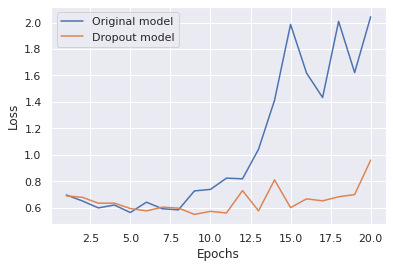

In [ ]:
val_loss2 = model2_history.history['val_loss']

epochs = range(1, len(val_loss2) + 1)

plt.plot(epochs, val_loss1, label = 'Original model')
plt.plot(epochs, val_loss2, label = 'Dropout model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

We can see that the dropout model overfits less as the loss curve for the dropout model starts to increase much slower compared to the original model when the two models start to overfit. Also, it appears that the dropout model starts to overfit after 13 epochs.

Let's evaluate the dropout model on the test data.

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model2.evaluate(test_generator)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 4s 81ms/step - loss: 1.0828 - accuracy: 0.7360


[1.0827562808990479, 0.7360000014305115]

We achieved an accuracy of 73.6%, which is slightly higher than what we got with the original model.

Let's also save our second model before we move on to the next part.

In [ ]:
model2.save("/content/drive/MyDrive/BUAI 446/Module04/CatsDogs_model2.h5")

## Data Augmentation

Overfitting is caused by having too few samples to learn from, which does not allow training a model that generalizes well to new data.
Given infinite data, our model would be exposed to every possible aspect of the data distribution at hand: we would never overfit. Data augmentation takes the approach of generating more training data from existing training samples, by "augmenting" the samples via a number of random transformations that yield believable-looking images. This helps the model get exposed to more aspects of the data and generalize better.

In Keras, this can be done by configuring a number of random transformations to be performed on the images read by our `ImageDataGenerator` instance. Let's get started with an example.

In [ ]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True)

These are just a few of the options available (for more, see the [Keras documentation](https://keras.io/api/preprocessing/image/#imagedatagenerator-class)). Let's quickly go over what we just wrote:

* `rotation_range` is a value in degrees (0-180), a range within which to randomly rotate pictures.
* `width_shift_range` and `height_shift_range` are ranges (as a fraction of total width or height) within which to randomly translate pictures
vertically or horizontally.
* `shear_range` is for randomly applying shearing transformations.
* `zoom_range` is for randomly zooming inside pictures.
* `horizontal_flip` is for randomly flipping half of the images horizontally -- relevant when there are no assumptions of horizontal
asymmetry (e.g. real-world pictures).


Here are a few examples of what we get with our data augmentation.

![cats_dogs_augmentation](https://blog.keras.io/img/imgclf/cat_data_augmentation.png)

If we train a new CNN using this data augmentation configuration, our network will never see the same input twice. However, the inputs
that it sees are still heavily intercorrelated, since they come from a small number of original images -- we cannot produce new information, we can only remix existing information.
As such, this might not be quite enough to completely get rid of overfitting, but it will help in most cases.
To further fight overfitting, in here, we will also keep the Dropout layer of model2.

In [ ]:
model3 = models.Sequential()

model3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(128, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Flatten())
model3.add(layers.Dropout(0.5))

model3.add(layers.Dense(256, activation='relu'))
model3.add(layers.Dense(1, activation='sigmoid'))

Note that model3 is identical to model2 in terms of architecture. However, when we train it (below), we will use data augmentation.

In [ ]:
model3.compile(loss='binary_crossentropy',
               optimizer='rmsprop',
               metrics=['accuracy'])

Before we run `model.fit`, we are going to use `ImageDataGenerator` to do data augmentation when creating training batches. Note that we only augment the training data; the validation data should not be augmented.

In [ ]:
# Define the data augmentation parameters in ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Note that the validation data should NOT be augmented
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Note: running this code can take up to an hour
model3_history = model3.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator)

Epoch 1/100
63/63 [==============================] - 1278s 20s/step - loss: 0.7764 - accuracy: 0.4840 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 2/100
63/63 [==============================] - 22s 347ms/step - loss: 0.6970 - accuracy: 0.5005 - val_loss: 0.6898 - val_accuracy: 0.6030
Epoch 3/100
63/63 [==============================] - 22s 347ms/step - loss: 0.6986 - accuracy: 0.5510 - val_loss: 0.6752 - val_accuracy: 0.6180
Epoch 4/100
63/63 [==============================] - 22s 346ms/step - loss: 0.6907 - accuracy: 0.5840 - val_loss: 0.6516 - val_accuracy: 0.6250
Epoch 5/100
63/63 [==============================] - 22s 346ms/step - loss: 0.6610 - accuracy: 0.6080 - val_loss: 0.6350 - val_accuracy: 0.6630
Epoch 6/100
63/63 [==============================] - 22s 345ms/step - loss: 0.6729 - accuracy: 0.6295 - val_loss: 0.8494 - val_accuracy: 0.5380
Epoch 7/100
63/63 [==============================] - 22s 346ms/step - loss: 0.6410 - accuracy: 0.6385 - val_loss: 0.6114 - val_accuracy:

Now, let's plot the training and validation accuracy.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


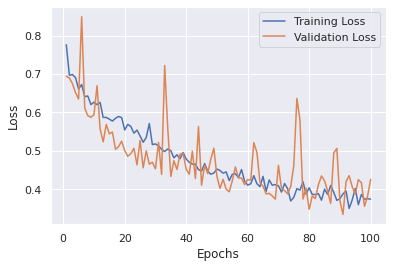

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

train_acc3  = model3_history.history['accuracy']
train_loss3 = model3_history.history['loss']
val_acc3  = model3_history.history['val_accuracy']
val_loss3 = model3_history.history['val_loss']

epochs = range(1, len(train_acc3) + 1)

plt.plot(epochs, train_loss3, label = 'Training Loss')
plt.plot(epochs, val_loss3, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

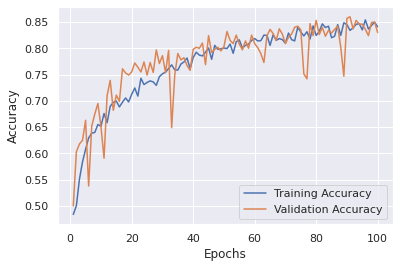

In [ ]:
plt.plot(epochs, train_acc3, label = 'Training Accuracy')
plt.plot(epochs, val_acc3, label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Thanks to data augmentation and dropout, we are no longer overfitting: the validation curves are rather closely tracking the training curves.
Let's evaluate our model3 on test data.

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

model3.evaluate(test_generator)

Found 1000 images belonging to 2 classes.
32/32 [==============================] - 4s 124ms/step - loss: 0.4672 - accuracy: 0.8160


[0.46716567873954773, 0.8159999847412109]

We are now able to reach an accuracy of 81.6% on the test data. This is much better than the base model (71.7%) and the model with only dropout (73.6%).

By leveraging regularization techniques even further and by tuning the network's parameters (such as the number of filters per convolution
layer, or the number of layers in the network), we may still be able to slightly improve the accuracy. However, it would prove
very difficult to go much higher just by training our own CNN from scratch, simply because we have so little data to work with. As a
next step to improve our accuracy on this problem, we will have to leverage a pre-trained model.



Before we move on, we can save this third model as follows.

In [ ]:
model3.save("/content/drive/MyDrive/BUAI 446/Module04/CatsDogs_model3.h5")

# Transfer learning: Using a pre-trained CNN

A common and highly effective approach to deep learning on small image datasets is to leverage a pre-trained network. A pre-trained network
is simply a saved network previously trained on a large dataset, typically on a large-scale image classification task. If this original
dataset is large enough and general enough, then the spatial feature hierarchy learned by the pre-trained network can effectively act as a
generic model of our visual world, and hence its features can prove useful for many different computer vision problems, even though these
new problems might involve completely different classes from those of the original task. For instance, one might train a network on
ImageNet (where classes are mostly animals and everyday objects) and then re-purpose this trained network for something like identifying furniture items in images. Such portability of learned features across different problems is a key advantage of deep learning
compared to many older shallow learning approaches (e.g., logistic regression), and it makes deep learning very effective for small-data problems.

In our case, we will consider a large CNN trained on the ImageNet dataset (1.4 million labeled images and 1000 different classes).
We will use the VGG16 architecture, developed by Karen Simonyan and Andrew Zisserman in 2014, a simple and widely used CNN architecture
for ImageNet. We chose VGG16 because its architecture is similar to what you are already familiar with, and easy to understand without introducing any new concepts.

## Feature extraction using transfer learning

Feature extraction consists of using the representations learned by a previous network to extract interesting features from new samples.
These features are then run through a new classifier, which is trained from scratch.

As we saw previously, CNNs used for image classification comprise two parts: they start with a series of convolution and pooling
layers, and they end with a densely-connected classifier. The first part is called the "convolutional base" of the model. In the case of CNNs, "feature extraction" will simply consist of taking the convolutional base of a previously-trained network, running the new data through it, and training a new classifier on top of the output.

![swapping FC classifiers](https://s3.amazonaws.com/book.keras.io/img/ch5/swapping_fc_classifier.png)

Why only reuse the convolutional base? Could we reuse the densely-connected classifier as well? In general, it should be avoided. The reason is simply that the representations learned by the convolutional base are likely to be more generic and therefore more reusable: the
feature maps of a CNN are presence maps of generic concepts over a picture, which is likely to be useful regardless of the computer vision problem at hand. On the other end, the representations learned by the densely-connected classifier will be very specific to the set of
classes that the model was trained on -- they will only contain information about the presence probability of this or that class in the
entire picture.

Let's put this in practice by using the convolutional base of the VGG16 network, trained on ImageNet, to extract interesting features from our cat and dog images, and then training a cat vs. dog classifier on top of these features.

The VGG16 model, among others, comes pre-packaged with Keras. You can import it from the `tensorflow.keras.applications` module. Here's the list of
image classification models (all pre-trained on the ImageNet dataset) that are available as part of `tensorflow.keras.applications`:

* Xception
* InceptionV3
* ResNet50
* VGG16
* VGG19
* MobileNet

Let's instantiate the VGG16 model:

In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

We passed three arguments to VGG16 constructor:

* `weights`, to specify which weight checkpoint to initialize the model from
* `include_top`, which refers to including or not the densely-connected classifier on top of the network. By default, this
densely-connected classifier would correspond to the 1000 classes from ImageNet. Since we intend to use our own densely-connected
classifier (with only two classes, cat and dog), we don't need to include it.
* `input_shape`, the shape of the image tensors that we will feed to the network. This argument is purely optional: if we don't pass it,
then the network will be able to process inputs of any size.

For more information on the arguments, please see [here](https://keras.io/api/applications/vgg/).

Here's the detail of the architecture of the VGG16 convolutional base: it's very similar to the simple convnets that you are already familiar with.

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

Let's add a densely-connected classifier on top of this convolutional base. Do not forget the Flatten layer (recall that densely-connected layers only accept vectors as their input).


In [ ]:
model4 = models.Sequential()

model4.add(conv_base)

model4.add(layers.Flatten())
model4.add(layers.Dense(256, activation='relu'))
model4.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


Next, we are going to "freeze" the convolutional base so that its pre-trained weights and biases do not change during the training of our densely-connected classifier.

In [ ]:
conv_base.trainable = False

Next, we use `ImageDataGenerator` as before to convert raw images into tensors that can be fed into our neural network. We also do data augmentation as we did in our previous model.

In [ ]:
# Define the data augmentation parameters in ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Note that the validation data should NOT be augmented
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Now we are ready to compile and train our model.

In [ ]:
model4.compile(loss='binary_crossentropy',
               optimizer='rmsprop',
               metrics=['accuracy'])

In [ ]:
# Note: running this code can take up to an hour
model4_history = model4.fit(
      train_generator,
      epochs=50,
      validation_data=validation_generator)

Epoch 1/50
63/63 [==============================] - 23s 361ms/step - loss: 1.0670 - accuracy: 0.6540 - val_loss: 0.3210 - val_accuracy: 0.8640
Epoch 2/50
63/63 [==============================] - 22s 355ms/step - loss: 0.5467 - accuracy: 0.7545 - val_loss: 0.2723 - val_accuracy: 0.8850
Epoch 3/50
63/63 [==============================] - 22s 355ms/step - loss: 0.4768 - accuracy: 0.7890 - val_loss: 0.2856 - val_accuracy: 0.8770
Epoch 4/50
63/63 [==============================] - 22s 354ms/step - loss: 0.4768 - accuracy: 0.7825 - val_loss: 0.2859 - val_accuracy: 0.8770
Epoch 5/50
63/63 [==============================] - 22s 354ms/step - loss: 0.4442 - accuracy: 0.7990 - val_loss: 0.3408 - val_accuracy: 0.8380
Epoch 6/50
63/63 [==============================] - 22s 357ms/step - loss: 0.4009 - accuracy: 0.8150 - val_loss: 0.5930 - val_accuracy: 0.7490
Epoch 7/50
63/63 [==============================] - 22s 356ms/step - loss: 0.3710 - accuracy: 0.8400 - val_loss: 0.2787 - val_accuracy: 0.8780

Saving the model:

In [ ]:
model4.save("/content/drive/MyDrive/BUAI 446/Module04/CatsDogs_model4.h5")

Now, let's plot the training and validation accuracy.

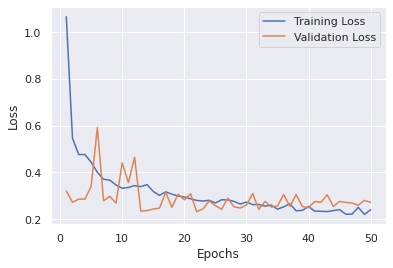

In [ ]:
train_acc4  = model4_history.history['accuracy']
train_loss4 = model4_history.history['loss']
val_acc4  = model4_history.history['val_accuracy']
val_loss4 = model4_history.history['val_loss']

epochs = range(1, len(train_acc4) + 1)

plt.plot(epochs, train_loss4, label = 'Training Loss')
plt.plot(epochs, val_loss4, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

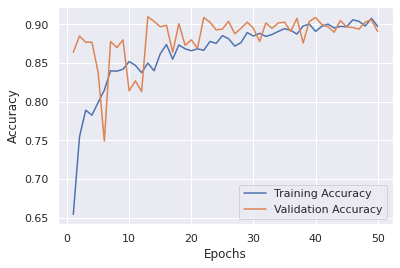

In [ ]:
plt.plot(epochs, train_acc4, label = 'Training Accuracy')
plt.plot(epochs, val_acc4, label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

As you can see, the model does not seem to overfit. The validation and training curves are close to each other, and the validation accuracy is around 90%.
Let's see how our model performs on the test set.

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

model4.evaluate(test_generator)

Found 1000 images belonging to 2 classes.
32/32 [==============================] - 4s 127ms/step - loss: 0.2679 - accuracy: 0.9010


[0.2678591012954712, 0.9010000228881836]

We reach a test accuracy of 90.1%. This is much better than what we had before

## Fine-tuning

Fine-tuning consists of unfreezing a few of the top layers
of a frozen model base used for feature extraction, and jointly training both the newly added part of the model (in our case, the
densely-connected classifier) and these top layers. This is called "fine-tuning" because it slightly adjusts the more abstract
representations of the pre-trained model being reused, in order to make them more relevant for the problem at hand.


We have stated before that it was necessary to freeze the convolution base of VGG16 in order to be able to train a randomly initialized
classifier on top. For the same reason, it is only possible to fine-tune the top layers of the convolutional base once the classifier on
top has already been trained. If the classified wasn't already trained, then the error signal propagating through the network during
training would be too large, and the representations previously learned by the layers being fine-tuned would be destroyed. Thus the steps
for fine-tuning a network are as follow:

* 1) Add your custom network on top of an already trained base network.
* 2) Freeze the base network.
* 3) Train the part you added.
* 4) Unfreeze some layers in the base network.
* 5) Jointly train both these layers and the part you added.

We have already completed the first 3 steps when doing feature extraction using transfer learning. Let's proceed with the 4th step: we will unfreeze the top 3 convolutional layers of our VGG16 convolutional base.


![fine-tuning VGG16](https://s3.amazonaws.com/book.keras.io/img/ch5/vgg16_fine_tuning.png)

As a reminder, this is what our convolutional base looks like:

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

We will fine-tune the last 3 convolutional layers, which means that all layers up until `block4_pool` should be frozen, and the layers
`block5_conv1`, `block5_conv2` and `block5_conv3` should be trainable.

Why not fine-tune more layers? Why not fine-tune the entire convolutional base? We could. However, we need to consider that:

* Earlier layers in the convolutional base encode more generic, reusable features, while layers higher up encode more specialized features. It is
more useful to fine-tune the more specialized features, as these are the ones that need to be repurposed on our new problem. There would
be fast-decreasing returns in fine-tuning lower layers.
* The more parameters we are training, the more we are at risk of overfitting. The convolutional base has 15M parameters, so it would be
risky to attempt to train it on our small dataset.

Thus, in our situation, it is a good strategy to only fine-tune the top 3 layers in the convolutional base.

Let's set this up, starting from where we left off in the previous example:

In [ ]:
model4 = models.load_model("/content/drive/MyDrive/BUAI 446/Module04/CatsDogs_model4.h5")

In [ ]:
conv_base.trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1': layer.trainable = True
    if layer.name == 'block5_conv2': layer.trainable = True
    if layer.name == 'block5_conv3': layer.trainable = True


Now we can start fine-tuning our network. We will do this with the RMSprop optimizer, using a very low learning rate. The reason for using
a low learning rate is that we want to limit the magnitude of the modifications we make to the representations of the 3 layers that we are
fine-tuning. Updates that are too large may harm these representations.

The default learning rate for RMSProp is 0.001; below, I reduce the learning rate to 0.00001.

In [ ]:
from tensorflow.keras import optimizers

model4.compile(loss='binary_crossentropy',
               optimizer=optimizers.RMSprop(learning_rate=0.00001),
               metrics=['accuracy'])

Now, we are ready to start fine-tuning the model. Note that the training process of model4 continues from where it was left before. That is, the first epoch below corresponds to epoch 51 of the training process of model4. (we previously trained model4 for 50 epochs, then we unfroze some of the layers, and now we are continuing the training process for another 100 epochs.)

In [ ]:
# Note: running this code can take up to an hour
model4_history = model4.fit(
      train_generator,
      epochs=100,
      validation_data=validation_generator)

Epoch 1/100
63/63 [==============================] - 19s 305ms/step - loss: 0.2004 - accuracy: 0.9105 - val_loss: 0.2931 - val_accuracy: 0.9070
Epoch 2/100
63/63 [==============================] - 19s 301ms/step - loss: 0.1927 - accuracy: 0.9240 - val_loss: 0.2922 - val_accuracy: 0.9100
Epoch 3/100
63/63 [==============================] - 19s 299ms/step - loss: 0.1990 - accuracy: 0.9160 - val_loss: 0.2915 - val_accuracy: 0.9100
Epoch 4/100
63/63 [==============================] - 19s 300ms/step - loss: 0.1980 - accuracy: 0.9120 - val_loss: 0.2901 - val_accuracy: 0.9100
Epoch 5/100
63/63 [==============================] - 19s 301ms/step - loss: 0.1978 - accuracy: 0.9165 - val_loss: 0.2888 - val_accuracy: 0.9110
Epoch 6/100
63/63 [==============================] - 19s 301ms/step - loss: 0.2108 - accuracy: 0.9110 - val_loss: 0.2870 - val_accuracy: 0.9090
Epoch 7/100
63/63 [==============================] - 19s 300ms/step - loss: 0.2007 - accuracy: 0.9225 - val_loss: 0.2859 - val_accuracy:

Let's assess our fine-tuned model on the test set.

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

model4.evaluate(test_generator)

Found 1000 images belonging to 2 classes.
32/32 [==============================] - 445s 14s/step - loss: 0.2674 - accuracy: 0.9110


[0.2673989236354828, 0.9110000133514404]

Our test accuracy increased to 91.1%, about one percent point higher than our previous model. In this case, fine-tuning has helped us to slightly improve the model.